<a href="https://colab.research.google.com/github/pallavmarch/Psychologytoday-therapist-analysis/blob/main/psychologytoday_webscraping_dataset_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [144]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from google.colab import files


!pip install pgeocode
import pgeocode

pd.set_option('display.max_rows', None)
pd.set_option("display.max_columns", None)
df=pd.read_csv("/content/therapists_profiles_data_Texas.csv",encoding='latin-1')
df.shape

(9078, 30)

In [124]:
df[df['Name'] == 'Kathy Lee Siepker']

,Profile URL,Name,Title,Location,State,ZIP Code,Phone,Individual Sessions ($),Couple Sessions ($),Pay By,Insurance,Top Specialties,Expertise,Types of Therapy,Personal Statement,Verified by Psychology Today,In Practice (years),Membership,Certificate,Attended University,Major/Degree,Graduation Year,Qualifications,Endorsement Count,Endorsed By,Age,Participants,Communities,Religion,I also speak
5743,https://www.psychologytoday.com/us/therapists/...,Kathy Lee Siepker,"Clinical Social Work/Therapist,PhD,LCSW,CDP","Flower Mound, TX 75028(214) 692-2076",TX,75028,(214) 692-2076,$150,$150,"ACH Bank transfer, American Express, Discover,...",Aetna | BlueCross and BlueShield | Carelon Beh...,Anxiety | Depression | Dementia,Career Counseling | Coping Skills | Emotional ...,Coaching | Cognitive Behavioral (CBT) | Cultur...,"I am a licensed clinical social worker, therap...",Yes,4,Not Found,National Council of Certified Dementia Practit...,The Ohio State University (PhD); Wash U (MSW),Social Work,2014,Verified byPsychology TodayLicensed by State o...,1,Jamie English - Clinical Social Work/Therapist...,Adults | Elders (65+),Individuals | Couples | Family,Bisexual Allied | Gay Allied | HIV / AIDS Alli...,Not Found,Korean


In [145]:
print(len(df[df['Location'].isnull()]))
df.dropna(subset=['Location'], inplace=True)
df = df.drop_duplicates(subset=['Profile URL'], keep='first')
df.shape

2


(9071, 30)

## Adding columns

In [146]:
df['Age'] = df['Age'].replace({'Elders (65+)': 'Elders'})
df['Dementia'] = df['Expertise'].str.lower().str.contains('dementia') | df['Top Specialties'].str.lower().str.contains('dementia')
#df['Autism'] = df['Expertise'].str.lower().str.contains('autism') | df['Top Specialties'].str.lower().str.contains('autism')
#df['Depression'] = df['Expertise'].str.lower().str.contains('depression') | df['Top Specialties'].str.lower().str.contains('depression')
df['Elders (65+)']=df['Age'].str.lower().str.contains('elders')
df['ZIP Code']=df['ZIP Code'].astype(int)

# DEMENTIA

In [164]:
Dementia=df[df['Dementia']==True]

Dementia=Dementia[['Name','Title', 'Location', 'ZIP Code', 'State',
       'Individual Sessions ($)', 'Couple Sessions ($)',
       'Insurance', 'Top Specialties', 'Expertise', 'Types of Therapy',
       'In Practice (years)', 'Membership', 'Certificate',
       'Major/Degree', 'Graduation Year', 'I also speak', 'Dementia','Elders (65+)']]

Dementia.size

4066

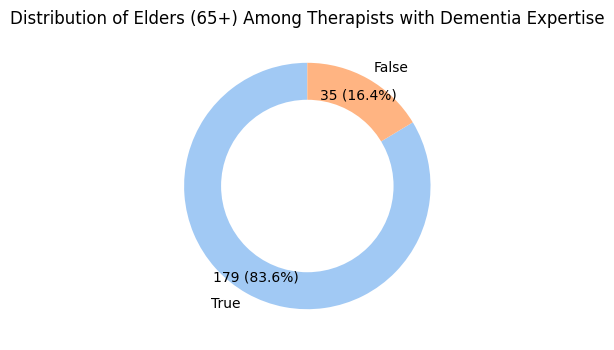

In [149]:
data = df[df['Dementia'] == True]['Elders (65+)'].value_counts()

labels = data.index
sizes = data.values
colors = sns.color_palette("pastel", len(labels))

fig, ax = plt.subplots(figsize=(4, 4))


wedges, texts, autotexts = ax.pie(
    sizes, labels=labels, startangle=90, pctdistance=0.85, colors=colors,
    autopct=lambda p: f'{int(round(p * sum(sizes) / 100))} ({p:.1f}%)',
    textprops={'fontsize': 10}
)


centre_circle = plt.Circle((0, 0), 0.70, fc='white')
ax.add_artist(centre_circle)

plt.title('Distribution of Elders (65+) Among Therapists with Dementia Expertise')
plt.show()

### Language

In [199]:
Dementia['I also speak'] = Dementia['I also speak'].str.lower()

phrases_to_remove = [
    "se habla espaã±ol | ",
    "conversational ",
    "in spanish and urdu | "
]
pattern = '|'.join(map(re.escape, phrases_to_remove))

Dementia['I also speak'] = Dementia['I also speak'].str.replace(f"{pattern}|\\b(\\w+)\\s*\\|\\s*\\1\\b", r'\1', regex=True)
language_list = Dementia['I also speak'].dropna().str.split('|').explode().str.strip()
language_list=language_list[language_list != 'not found']
language_counts = language_list.value_counts()


<ipython-input-200-7513ca6e4ec2>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


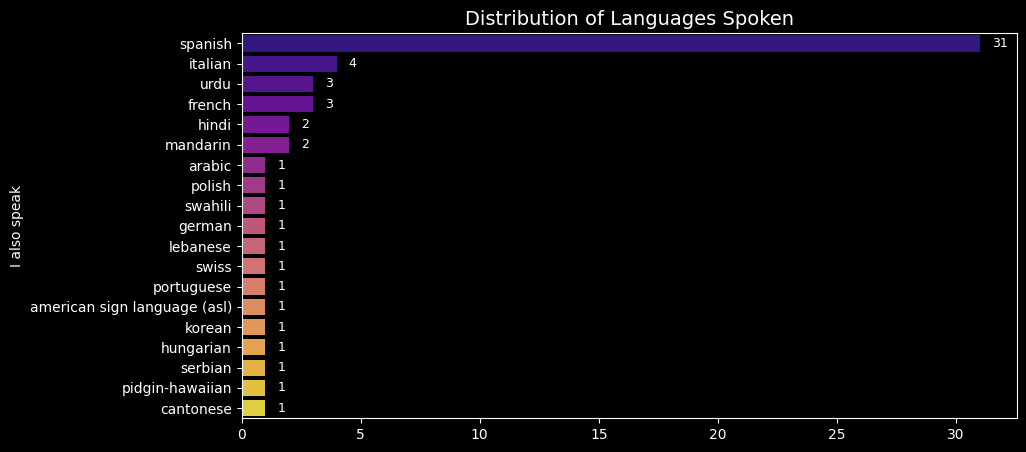

In [200]:
plt.style.use("dark_background")

plt.figure(figsize=(10, 5))
ax = sns.barplot(
    y=language_counts.index,
    x=language_counts.values,
    palette="plasma"
)

for index, value in enumerate(language_counts.values):
    ax.text(value + 0.5, index, str(value), color='white', fontsize=9, va='center')

plt.title("Distribution of Languages Spoken", fontsize=14, color='white')


plt.xticks(color='white')
plt.yticks(color='white')
plt.show()

In [207]:
Dementia[Dementia['I also speak'].str.lower().str.contains('spanish')]

,Name,Title,Location,ZIP Code,State,Individual Sessions ($),Couple Sessions ($),Insurance,Top Specialties,Expertise,Types of Therapy,In Practice (years),Membership,Certificate,Major/Degree,Graduation Year,I also speak,Dementia,Elders (65+)
4,Clarissa Anahi Cantu,"Licensed Professional Counselor,MS,LPC,LPCC","Austin, TX 78701(512) 640-0239",78701,TX,$150,$170,Aetna | BlueCross and BlueShield | Cigna and E...,Depression | Anxiety | Grief,Anger Management | Behavioral Issues | Bisexua...,Adlerian | Cognitive Behavioral (CBT) | Compas...,7,Not Found,EMDR Therapy Basic Training2020,Masters of Science in Clinical Mental Health C...,2018,spanish,True,True
86,Jaime Nichols,"Clinical Social Work/Therapist,LCSW","12319 Willow Wild DriveAustin, TX 78758(512) 8...",78758,TX,$95,$95,Aetna | BlueCross and BlueShield | Cigna and E...,Trauma and PTSD | Anxiety | Grief,Addiction | Alcohol Use | Ambiguous Loss | Chr...,Acceptance and Commitment (ACT) | Coaching | C...,9,Not Found,Not Found,Not Found,2015,italian | spanish,True,True
122,Salimah Khan LLC,"Psychologist,PsyD(she, her)","Houston, TX 77096(346) 567-5968",77096,TX,$150,Not Found,Aetna | BlueCross and BlueShield | Cigna and E...,Not Found,Anxiety | Bipolar Disorder | Body Positivity |...,Art Therapy | Coaching | Cognitive Behavioral ...,25,American Psychological AssociationAPA / 2024,Not Found,Psy.D. BA Psychology / Certified Executive Lif...,1999,spanish | urdu,True,True
197,Nicole Vargas,"Marriage & Family Therapist,PhD,LMFT,BAS","Family Table Counseling PLLCSouthlake, TX 7609...",76092,TX,$215,$215,Out of Network,Marital and Premarital | Relationship Issues |...,Anxiety | Bisexual | Body Positivity | Cancer ...,Art Therapy | Bowen Family Systems | Coaching ...,Not Found,Not Found,AAMFT2011,Not Found,2012,spanish,True,True
670,Counseling and Wellness Services,"Marriage & Family Therapist,PhD,LMFT-S,CAC,MTS,MA","Harlingen, TX 78550(956) 363-4283",78550,TX,$100,Not Found,BlueCross and BlueShield | UnitedHealthcare UH...,Marital and Premarital | Addiction | Depression,ADHD | Adoption | Alcohol Use | Anger Manageme...,Acceptance and Commitment (ACT) | Adlerian | A...,34,AAMFT-Clinical Fellow72288 / 1999,Not Found,Ph.D. in Psychology,2005,italian | spanish,True,True
904,Jesus Aranda Bilingual,"Psychologist,PsyD",Centric Physicians Behavioral Services17 Old S...,78006,TX,Not Found,Not Found,Aetna | BlueCross and BlueShield | Carelon Beh...,Testing and Evaluation | Depression | Dementia,ADHD | Anxiety | Asperger's Syndrome | Autism ...,Cognitive Behavioral (CBT) | Emotionally Focus...,Not Found,Not Found,Universidad Europea Miguel de CervantesNeurops...,Not Found,2009,spanish,True,True
983,Lucia Anna Leo,"Clinical Social Work/Therapist,LCSW-S,BCD(she,...",Mariposa Wellness Center813 North Main StreetS...,78501,TX,$150,$200,Aetna | Ambetter | BlueCross and BlueShield | ...,Anger Management | Behavioral Issues | Family ...,"Addiction | ADHD | Adjustment Issues, EAP, Los...",Acceptance and Commitment (ACT) | Clinical Sup...,Not Found,Not Found,American Board of Clinical Social Work2024,Texas,1999,spanish,True,True
1028,Wendy MacArthur Shaikh,"Pre-Licensed Professional,CI(she, her)",Serenity Wellness Ranch902 North San Jacinto S...,77301,TX,$25,$50,Not Found,Child | Parenting | Infidelity,Addiction | ADHD | Alcohol Use | Antisocial Pe...,Christian Counseling | Cognitive Behavioral (C...,1,Not Found,CPR & AED245419310215 / 2024,Not Found,Not Found,spanish,True,True
1031,"Counseling By Penny Haight, PLLC","Licensed Professional Counselor,MEd,LPC-S",Counseling By Penny Haight4545 Bellaire Dr SST...,76109,TX,$150,Not Found,Aetna | Anthem | BlueCross and BlueShield | Ci...,Relationship Issues | Anxiety | Self Esteem,Addiction | ADHD | Alcohol Use | Anger Managem...,Acceptance and Commitment (ACT) | Attachment-b...,Not Found,Not Found,Gottman Level 2 Trained Therapist2017,Not Found,2005,spanish,True,True
1281,Erik Alejandro Halgunseth,"Licensed Professional Counselor,MA,LPC,LCDC-I","18830 Stone Oak P

In [143]:
Language = Language.assign(Languages=Dementia['I also speak'].str.split('|')).explode('Languages')
Language['Languages'] = Language['I also speak'].str.strip()
Language

,Name,I also speak,Languages
4,Clarissa Anahi Cantu,spanish,spanish
28,Vanessa Joy,not found,not found
44,Vanessa Garcia,not found,not found
86,Jaime Nichols,italian | spanish,italian | spanish
86,Jaime Nichols,italian | spanish,italian | spanish
101,Brenda L Bejar,not found,not found
122,Salimah Khan LLC,spanish | urdu,spanish | urdu
122,Salimah Khan LLC,spanish | urdu,spanish | urdu
133,Dr. Wayne Dees,not found,not found
134,Alison Liel Prince,not found,not found


In [82]:
Language['Languages'].value_counts()

,count
Languages,
not found,171
spanish,24
spanish,5
urdu,3
italian,2
spanish,2
hindi,2
arabic,1
french,1


In [ ]:
#Languages_expanded['Languages'] = Languages_expanded['Languages'].str.strip()
Languages_expanded = Languages_expanded.drop(columns=['I also speak'])


In [ ]:



# Clean extra spaces

# Count occurrences of each language

# Plot horizontal bar graph
plt.figure(figsize=(10, 6))
sns.barplot(x=language_counts.values, y=language_counts.index, palette="viridis")

# Labels and Title
plt.xlabel('Count')
plt.ylabel('Languages Spoken')
plt.title('Distribution of Languages Spoken')

# Rotate x-axis labels to 75 degrees
plt.xticks(rotation=75)

# Show the plot
plt.show()


In [13]:
Language

In [18]:
plt.figure(figsize=(15, 6))
sns.barplot(x=Language['I also speak'].values, y=Language['I also speak'].index, palette="viridis")

# Labels and Title
plt.xlabel('Count')
plt.ylabel('Languages Spoken')
plt.title('Distribution of Languages Spoken')

# Show the plot
plt.show()


ValueError: Per-column arrays must each be 1-dimensional

<Figure size 1500x600 with 0 Axes>

### Insurance

In [ ]:
def transform_insurance(row):
  insurance = str(row).lower()
  if "not found" in insurance:
    return "No"
  elif insurance == "out of network":
    return "Out of Network"
  elif "medicare" in insurance and "medicaid" in insurance:
    return "Both Medicare and Medicaid"
  elif "medicare" in insurance:
    return "Medicare"
  elif "medicaid" in insurance:
    return "Medicaid"
  else:
    return "Yes"

Dementia['Insurance_Category'] = Dementia['Insurance'].apply(transform_insurance)


Dementia.insert(10, 'Insurance_Category', Dementia.pop('Insurance_Category'))


### Title

In [ ]:
Dementia['Title'] = Dementia['Title'].str.lower()
Dementia['Title'].value_counts().sort_index()

,count
Title,
clinical social work/therapist,1
"clinical social work/therapist,dsw,lcsw-s(she, her)",1
"clinical social work/therapist,lcsw",23
"clinical social work/therapist,lcsw(he, him)",1
"clinical social work/therapist,lcsw(she, her)",13
"clinical social work/therapist,lcsw,cart",1
"clinical social work/therapist,lcsw,lcdc",2
"clinical social work/therapist,lcsw,lsw,msw",1
"clinical social work/therapist,lcsw-s",2


In [ ]:
Dementia['Title_shorten']=Dementia['Title'].str.split(',').str[0]
Dementia['Title_shorten']=Dementia['Title_shorten'].str.split('(').str[0]
Dementia.insert(2, 'Title_shorten', Dementia.pop('Title_shorten'))
Dementia['Title_shorten'].value_counts()

,count
Title_shorten,
licensed professional counselor,73
clinical social work/therapist,68
psychologist,40
marriage & family therapist,10
licensed professional counselor associate,8
ms,2
marriage & family therapist associate,2
psychological associate,2
lpc associate,2


### Certifications

In [ ]:
Dementia['Certificate'] = Dementia['Certificate'].str.lower()
Dementia['Certificate'].value_counts()


,count
Certificate,
not found,143
emdr therapy basic training2020,2
evangelical lutheran church in americaretired clergy / 1990,1
national council of certified dementia practitionerscdp 273459 / 2023,1
american assoc. for marriage and family therapists155259 / 2014,1
national board of certified counselors1629387 / 2021,1
capella universitygeriatric psychology / 2001,1
ccsas2012,1
emdr association / emdr certified55705340 / 2019,1


In [ ]:
Dementia['Certificate_clean']=Dementia['Certificate'].str.split('/').str[0]
Dementia['Certificate_clean'] = Dementia['Certificate_clean'].str.replace(r'[\d,]', '', regex=True)  # Remove numbers and commas


In [ ]:
Dementia['Certificate_clean'].value_counts().sort_index()

,count
Certificate_clean,
aamft,1
aamftmft supervisor,1
alternative dispute resolution,1
american assoc. for marriage and family therapists,1
american association of christian counselors,1
american board of clinical social work,1
american counseling association,1
american counseling association,1
american psychotherapy association,1


## Adding county, city

In [ ]:
# Initialize the geocoder for US ZIP codes
nomi = pgeocode.Nominatim('us')

# Function to fetch city and county from ZIP Code
def get_location_info(zip_code):
    location = nomi.query_postal_code(zip_code)
    return pd.Series([location['place_name'], location['county_name']])

df[['City', 'County']] = df['ZIP Code'].astype(str).apply(get_location_info)

In [ ]:
Dementia.to_csv('Dementia.csv')
files.download('Dementia.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### pivot Table and graph

In [ ]:
cols_to_clean = ['Individual Sessions ($)', 'Couple Sessions ($)', 'In Practice (years)']

Dementia[cols_to_clean] = (
    Dementia[cols_to_clean]
    .replace('Not Found', np.nan)
    .apply(lambda x: x.str.replace(r'[$ ]', '', regex=True).astype(float))
   # .astype('Int64')
)


value_counts_list = [
    Dementia[col].value_counts().astype(int).rename_axis(col).reset_index(name='Count')
    for col in cols_to_clean
]
side_by_side = pd.concat(value_counts_list, axis=1)


pivot_table1 = pd.pivot_table(Dementia,
                              values=cols_to_clean,
                              aggfunc=['mean', 'median', 'min', 'max', 'std', 'count', 'nunique', lambda x: x.isnull().sum()],
                              columns=['Dementia'],
                              dropna=True)

pivot_table1 = pivot_table1.applymap(lambda x: int(x) if not pd.isna(x) else x)
pivot_table1.style.background_gradient(cmap='Blues').format("{:.0f}")

<ipython-input-8-268e5f8c66e1>:24: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  pivot_table1 = pivot_table1.applymap(lambda x: int(x) if not pd.isna(x) else x)


,mean,median,min,max,std,count,nunique,
Dementia,True,True,True,True,True,True,True,True
Couple Sessions ($),156,150,50,275,49,68,26,93
In Practice (years),14,12,1,41,9,102,34,59
Individual Sessions ($),139,150,25,250,42,123,32,38


However There are rows with blank Individual Sessions ($), couple Sessions ($) and In Practice (years) which are not considered 0 instead of blank

<ipython-input-10-5d5d0895877b>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=insurance_counts, y='Insurance Category', x='Count', palette='Blues_r')


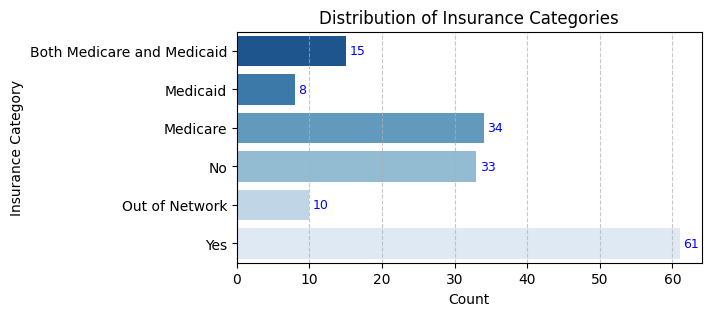

In [ ]:

insurance_counts = Dementia['Insurance_Category'].value_counts().reset_index()
insurance_counts.columns = ['Insurance Category', 'Count']
insurance_counts = insurance_counts.sort_values(by='Insurance Category')

plt.figure(figsize=(6, 3))
ax = sns.barplot(data=insurance_counts, y='Insurance Category', x='Count', palette='Blues_r')

for p in ax.patches:
        ax.annotate(
            format(p.get_width(), '.0f'),
            (p.get_x() + p.get_width() + 0.5, p.get_y() + p.get_height() / 2.),
            ha='left', va='center', fontsize=9, color='blue'
        )

plt.title("Distribution of Insurance Categories")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
Dementia.to_csv('Dementia.csv')